In [1]:
from core import *
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('./03_Simulated_data/Criteria_3.csv')
data = data.iloc[:,1:]
j = data.mean(axis=1)

In [21]:
a = list(j)
print(sum(a)/len(a))

0.06432836580876998


(array([  8.,  17.,  58., 124., 212., 239., 195., 103.,  34.,  10.]),
 array([-2.87212044, -2.31762921, -1.76313797, -1.20864674, -0.65415551,
        -0.09966428,  0.45482696,  1.00931819,  1.56380942,  2.11830065,
         2.67279188]),
 <BarContainer object of 10 artists>)

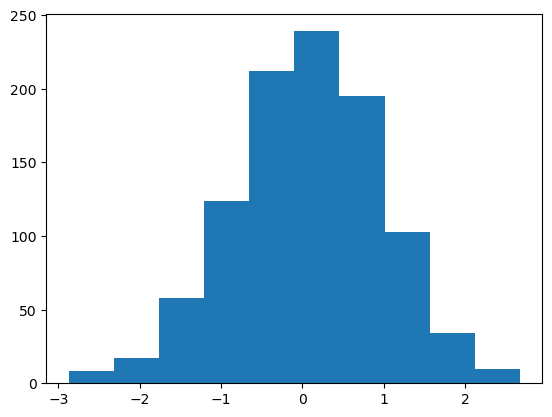

In [22]:
# import necessary packages
import matplotlib.pyplot as plt
plt.hist(a)

In [429]:
# Create circadian data via Cholesky
# Criteria 1: Circadian vs Non-circadian
circadian = []
type_1 = []
for x in range(100):
    param_GP = Parameters()
    param_GP.p = 24
    param_GP.l = 2
    param_GP.sigma_f2 = 1
    param_GP.sigma_n2 = 0.01

    x_torch = Array(np.arange(1,72,3)).to_tensor() 
    x_scale = Array(np.arange(1,72,1)).to_tensor() 
    Crit_1 = GaussianProcess(x_arr = x_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    Crit_1.t_arr = Crit_1.sample_f()
    a = Crit_1.t_arr.to_numpy()
    circadian.append(a.arr.flatten())
    type_1.append('Circadian')

In [430]:
pt_1 = pd.DataFrame(type_1)
pt_2 = pd.DataFrame(circadian)
frames = [pt_1, pt_2]
result_1 = pd.concat(frames, axis = 1)
result_1

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Circadian,0.221651,0.438255,0.446855,0.980892,0.709677,0.501772,0.503669,0.450842,0.406424,...,0.307297,0.391289,0.186088,0.125912,0.565426,0.957066,0.587904,0.580721,0.448040,0.481819
1,Circadian,0.679899,0.517802,-0.150405,-0.207012,-0.292910,0.102173,0.568295,0.780414,0.749728,...,0.464111,0.814705,0.641987,0.564826,0.163762,-0.312922,-0.451471,-0.087754,0.631963,0.919539
2,Circadian,0.295051,1.560549,2.372856,2.121624,1.722027,0.765243,-0.142936,-0.420029,0.080242,...,-0.223807,-0.540464,0.195217,1.394375,2.220294,2.086645,1.582082,0.543376,-0.240107,-0.627997
3,Circadian,-0.959735,-0.550065,0.476969,0.369084,-0.376581,-0.934740,-1.128448,-1.233351,-0.811956,...,-0.987796,-1.027746,-0.680791,-0.194582,0.284287,0.454590,-0.307567,-1.028106,-0.986425,-0.851151
4,Circadian,-0.798355,-1.087909,-0.658098,-0.225469,0.420358,0.285236,0.006323,-0.230917,-0.568643,...,-0.158749,-0.177544,-0.753282,-1.052978,-0.902234,0.014017,0.346189,0.277407,-0.030877,-0.245840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Circadian,0.085257,0.752292,0.843115,0.554286,0.320934,-0.340004,-0.543007,-0.358145,0.071077,...,-0.511749,-0.450673,0.195251,0.481407,0.757386,0.538965,0.261359,-0.043524,-0.298915,-0.348570
96,Circadian,-0.852752,-0.311417,0.266688,0.085469,-0.634945,-0.810941,-1.046781,-1.241000,-0.766799,...,-0.888398,-1.018210,-0.915946,-0.438584,0.347324,-0.022555,-0.326907,-0.807379,-0.838681,-0.987060
97,Circadian,0.125346,-0.179630,-0.435502,-1.135023,-1.466913,-0.618554,0.332726,0.739749,0.241317,...,0.324899,0.527700,0.214662,-0.070074,-0.582425,-1.185515,-1.242839,-0.430329,0.427433,0.678618
98,Circadian,0.445110,0.882181,0.765216,0.369720,0.204504,0.387804,0.132703,0.216849,0.607177,...,0.280206,0.117205,0.700313,0.561010,0.719327,0.493935,0.333544,0.212858,0.238011,0.163110


In [431]:
non_circadian = []
type_2 = []
for x in range(100):
    param_GP = Parameters()
    param_GP.l = 2
    param_GP.sigma_f2 = 1
    param_GP.sigma_n2 = 0.01

    x_torch = Array(np.arange(1,72,3)).to_tensor() 
    x_scale = Array(np.arange(1,72,1)).to_tensor() 
    Crit_2 = GaussianProcess(x_arr = x_torch, kernel_para = param_GP, ker_func = se_kernel, covmat_func = cal_se_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = se_kernel, covmat_func = cal_se_cov_mat)
    Crit_2.t_arr = Crit_2.sample_f()
    b = Crit_2.t_arr.to_numpy()
    non_circadian.append(b.arr.flatten())
    type_2.append('Non-circadian')

In [432]:
pt_1 = pd.DataFrame(type_2)
pt_2 = pd.DataFrame(non_circadian)
frames = [pt_1, pt_2]
result_2 = pd.concat(frames, axis = 1)
result_2

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Non-circadian,-0.108680,-0.529362,-0.845461,1.744639,0.577984,0.174177,-0.303895,0.885937,-1.199747,...,-0.915170,0.452199,0.190758,0.627257,-0.839157,-0.947784,-0.448521,-1.122862,-0.608383,2.996736
1,Non-circadian,0.484720,0.179024,0.787257,1.082143,0.874693,-0.986070,-1.079329,-1.663579,-0.967811,...,-0.307539,0.105751,-1.996538,-0.759151,-0.360319,0.712953,-0.414563,-1.358208,-0.348002,-0.079688
2,Non-circadian,1.648773,1.870152,0.452818,0.514369,-1.399233,-1.042774,-1.837708,-0.087052,-0.051946,...,-0.092692,1.389657,-1.144014,0.351802,1.143345,0.882389,-0.535333,0.446649,0.361471,1.955964
3,Non-circadian,-1.380857,0.410032,0.510127,0.683561,-0.259422,-0.904434,-1.039606,0.100324,-1.822752,...,-0.869715,-1.453873,-2.244195,0.624549,1.617596,-1.033271,0.183520,2.721400,1.995554,1.490414
4,Non-circadian,-0.319970,-0.811507,0.521393,-0.873026,-0.318871,0.542963,0.925379,-0.146228,-0.837690,...,-2.946645,-0.054615,-0.358247,0.297567,-0.872819,-2.037910,-0.381313,-0.146652,-1.033260,0.500062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Non-circadian,0.052873,1.539773,1.742577,-0.096960,1.307351,-0.008120,0.037435,0.420207,-0.339587,...,0.468721,-1.886641,-0.846162,1.100235,1.256078,0.563961,0.289192,0.884833,2.382878,-0.516980
96,Non-circadian,1.087766,-0.345734,-0.070224,-1.659538,-1.481270,-0.846778,-0.096289,-1.039504,-1.299641,...,-0.101106,-0.298214,0.714456,1.424251,0.665766,-0.586286,-0.692762,-1.001041,-0.808438,0.251488
97,Non-circadian,-0.844199,-0.961693,0.891934,-1.067511,-0.867589,-0.456151,-1.345755,-2.083179,0.034012,...,1.228879,0.040846,-0.415536,1.131860,0.250847,-0.889888,-1.648497,0.763156,0.800294,1.073629
98,Non-circadian,-0.332327,-2.127329,0.061782,1.893576,-0.985018,-0.737988,0.082003,-1.152074,-0.419162,...,-1.488052,-0.304680,-0.997341,0.983894,0.122372,1.065490,0.055212,-0.389906,-1.350896,-1.116303


In [433]:
frames = [result_1, result_2]
result_3 = pd.concat(frames)
result_3

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Circadian,0.221651,0.438255,0.446855,0.980892,0.709677,0.501772,0.503669,0.450842,0.406424,...,0.307297,0.391289,0.186088,0.125912,0.565426,0.957066,0.587904,0.580721,0.448040,0.481819
1,Circadian,0.679899,0.517802,-0.150405,-0.207012,-0.292910,0.102173,0.568295,0.780414,0.749728,...,0.464111,0.814705,0.641987,0.564826,0.163762,-0.312922,-0.451471,-0.087754,0.631963,0.919539
2,Circadian,0.295051,1.560549,2.372856,2.121624,1.722027,0.765243,-0.142936,-0.420029,0.080242,...,-0.223807,-0.540464,0.195217,1.394375,2.220294,2.086645,1.582082,0.543376,-0.240107,-0.627997
3,Circadian,-0.959735,-0.550065,0.476969,0.369084,-0.376581,-0.934740,-1.128448,-1.233351,-0.811956,...,-0.987796,-1.027746,-0.680791,-0.194582,0.284287,0.454590,-0.307567,-1.028106,-0.986425,-0.851151
4,Circadian,-0.798355,-1.087909,-0.658098,-0.225469,0.420358,0.285236,0.006323,-0.230917,-0.568643,...,-0.158749,-0.177544,-0.753282,-1.052978,-0.902234,0.014017,0.346189,0.277407,-0.030877,-0.245840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Non-circadian,0.052873,1.539773,1.742577,-0.096960,1.307351,-0.008120,0.037435,0.420207,-0.339587,...,0.468721,-1.886641,-0.846162,1.100235,1.256078,0.563961,0.289192,0.884833,2.382878,-0.516980
96,Non-circadian,1.087766,-0.345734,-0.070224,-1.659538,-1.481270,-0.846778,-0.096289,-1.039504,-1.299641,...,-0.101106,-0.298214,0.714456,1.424251,0.665766,-0.586286,-0.692762,-1.001041,-0.808438,0.251488
97,Non-circadian,-0.844199,-0.961693,0.891934,-1.067511,-0.867589,-0.456151,-1.345755,-2.083179,0.034012,...,1.228879,0.040846,-0.415536,1.131860,0.250847,-0.889888,-1.648497,0.763156,0.800294,1.073629
98,Non-circadian,-0.332327,-2.127329,0.061782,1.893576,-0.985018,-0.737988,0.082003,-1.152074,-0.419162,...,-1.488052,-0.304680,-0.997341,0.983894,0.122372,1.065490,0.055212,-0.389906,-1.350896,-1.116303


In [434]:
result_3 = result_3.sample(frac=1)
result_3

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
81,Non-circadian,0.698427,0.145982,-0.321536,-0.744002,0.907988,0.990725,-1.327865,1.206321,0.729379,...,2.874331,1.730081,-0.392666,0.340219,0.292838,-0.913142,1.496857,1.177789,-0.692149,0.082116
53,Non-circadian,1.538076,-1.320257,-1.401309,1.979303,1.469069,0.215204,-1.607450,-0.892984,0.554362,...,-1.259096,0.155472,-0.217155,-0.170437,-1.265765,-1.297492,0.106929,-0.113152,0.651740,-0.559266
29,Circadian,1.375091,0.892937,0.101587,-0.099923,-0.365982,0.007422,0.784729,1.217934,1.349354,...,0.672314,1.335933,1.317265,0.950328,0.167837,-0.156126,-0.224369,0.103352,0.653877,1.160225
54,Non-circadian,0.102710,0.640553,0.243032,0.606256,1.097210,-0.656465,-0.326142,1.111158,0.409028,...,0.874444,0.474235,-0.184441,-1.368100,-1.205063,-1.231111,0.222034,-0.606559,0.043739,0.601049
35,Circadian,-1.394646,-1.539807,-1.286475,-0.925445,-0.636454,-0.418173,-0.480084,-0.967405,-1.548445,...,-0.524271,-0.756836,-1.450183,-1.439650,-1.085895,-0.798013,-0.644736,-0.531221,-0.549226,-0.738286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Non-circadian,-0.420611,-1.394825,0.005328,-0.999545,0.253518,-0.383641,0.480564,-1.096179,-0.713135,...,-0.998255,0.477518,1.047134,-0.255304,0.185254,0.896976,0.296192,-0.179270,-1.307400,-1.794443
67,Non-circadian,-1.835192,-1.886382,0.065251,1.441141,1.262073,2.246916,0.667304,0.051029,1.770011,...,0.181153,0.092113,-0.261946,0.286028,-0.505748,0.209051,0.786396,-0.275569,-1.394349,-0.861169
63,Circadian,1.394238,1.058958,0.606189,0.053795,0.028985,-0.143373,0.097794,0.698026,1.546149,...,0.092440,1.186350,1.243787,1.061774,0.569971,0.061665,0.027264,-0.020866,0.217234,1.166428
80,Non-circadian,-0.152429,-0.285192,-1.061526,0.526646,-0.163487,1.930082,1.406169,2.229544,0.895971,...,0.243346,-0.499670,-0.481933,-0.099481,-0.776343,1.745337,1.767951,-0.909640,0.997420,-0.279933


In [435]:
# Save result_1
result_3.to_csv('Criteria_1.csv', index=False)

In [108]:
np.random.choice(np.arange(12,25,3))

15

In [13]:
np.random.choice(np.arange(12,25,3))

18

(array([40.,  0., 38.,  0.,  0., 38.,  0., 47.,  0., 37.]),
 array([12. , 13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. ]),
 <BarContainer object of 10 artists>)

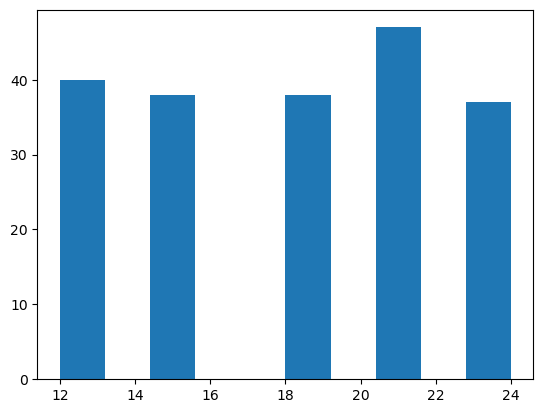

In [24]:
# Criteria 2: Varying period
circadian = []
period = []
for x in range(200):
    param_GP = Parameters()
    param_GP.p = np.random.choice(np.arange(12,25,3))
    param_GP.l = 2
    param_GP.sigma_f2 = 1
    param_GP.sigma_n2 = 0.01

    #print(param_GP.p)
    x_torch = Array(np.arange(1,72,3)).to_tensor() 
    x_scale = Array(np.arange(1,72,1)).to_tensor() 
    Crit_1 = GaussianProcess(x_arr = x_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    Crit_1.t_arr = Crit_1.sample_f()
    #Crit_1.plot_f_gp(new_pse)
    #Crit_1.plot_data()
    #plt.show()
    a = Crit_1.t_arr.to_numpy()
    circadian.append(a.arr.flatten())
    period.append(param_GP.p)
plt.hist(period)

In [25]:
pt_1 = pd.DataFrame(period)
pt_2 = pd.DataFrame(circadian)
frames = [pt_1, pt_2]
result_5 = pd.concat(frames, axis = 1)
result_5

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,21,-1.718954,-1.691043,-1.642946,-1.391896,-1.432356,-1.502498,-1.567013,-1.708125,-1.909684,...,-1.795348,-1.898264,-1.706248,-1.351429,-1.367360,-1.449894,-1.540026,-1.742142,-1.792836,-1.507278
1,15,0.977772,1.283867,0.424134,0.666083,1.197221,1.256821,1.558977,0.515473,0.911616,...,1.169901,1.206303,1.441114,0.597549,0.593849,1.171157,1.074892,1.504162,0.483735,0.769843
2,21,0.288272,0.131417,-0.375866,-1.143968,-1.577155,-1.449573,-0.450417,0.030531,-0.044709,...,0.087739,0.054209,-0.606028,-1.420412,-1.584056,-1.310787,-0.372544,0.081647,0.048847,-0.630479
3,12,0.084415,0.226606,-0.577496,-0.108719,0.060668,0.079013,-0.701301,-0.118172,0.270028,...,-0.689872,-0.083405,0.271842,0.249471,-0.853685,-0.052672,0.110875,0.196315,-0.732634,-0.143311
4,21,-0.305419,-0.274970,-0.178649,0.035484,0.079742,-0.264729,-0.122048,-0.172690,-0.429746,...,-0.296850,-0.402425,-0.326929,0.164808,-0.048252,-0.308193,-0.082415,-0.403397,-0.461620,-0.455310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,18,-0.057477,0.169946,0.164264,0.096891,-0.603829,-0.712205,-0.298654,0.222609,0.231836,...,0.060631,0.075238,-0.513759,-0.519808,-0.401872,0.161764,0.083780,0.178427,-0.567110,-0.580449
196,21,-0.323886,-0.906355,-2.022322,-2.328225,-1.407554,-0.934655,-0.789935,-0.500472,-1.094664,...,-0.229264,-1.033561,-2.109907,-2.302285,-1.535488,-0.876040,-0.948847,-0.313105,-0.963163,-2.158368
197,21,0.829719,0.893820,0.692402,0.271071,0.115535,0.386190,0.461819,1.040863,1.042080,...,0.862813,0.831198,0.616925,0.338538,0.187360,0.411262,0.772672,0.955424,0.886216,0.681139
198,15,-0.848668,-0.834516,-0.843127,-0.592752,-0.747928,-0.835048,-1.008618,-0.898258,-0.738083,...,-0.659098,-1.100736,-0.969629,-0.867775,-0.609312,-0.515775,-0.957925,-0.903732,-0.680884,-0.606511


In [26]:
result_5.to_csv('./03_Simulated_data/Criteria_2_fixed.csv', index=False)

In [5]:
# Maybe with noise 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1
level = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
level = np.power(level,2)
level 

array([0.0025, 0.01  , 0.0225, 0.04  , 0.0625, 0.09  , 0.1225, 0.16  ,
       0.2025, 0.25  ])

In [7]:
# Fix GP ground truth column:
# Criteria 3: Varying noise
circadian = []
level = np.power([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],2)
noise = []
for l in level: 
    for x in range(100):
        param_GP = Parameters()
        param_GP.p = 24
        param_GP.l = 2
        param_GP.sigma_f2 = 1
        param_GP.sigma_n2 = l

        #print(param_GP.sigma_n2)
        x_torch = Array(np.arange(1,72,3)).to_tensor() 
        x_scale = Array(np.arange(1,72,1)).to_tensor() 
        Crit_1 = GaussianProcess(x_arr = x_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
        new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
        Crit_1.t_arr = Crit_1.sample_f()
        #Crit_1.plot_f_gp(new_pse)
        #Crit_1.plot_data()
        #plt.show()
        a = Crit_1.t_arr.to_numpy()
        circadian.append(a.arr.flatten())
        noise.append(param_GP.sigma_n2)

In [8]:
pt_1 = pd.DataFrame(noise)
pt_2 = pd.DataFrame(circadian)
frames = [pt_1, pt_2]
result_1 = pd.concat(frames, axis = 1)
result_1

,0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0.0025,0.893026,1.255182,1.273792,1.145777,1.165499,0.855831,0.648901,0.692694,1.037218,...,0.607036,0.623443,0.799760,1.252119,1.271934,1.116719,1.081066,0.866323,0.574057,0.610190
1,0.0025,-0.241535,0.083742,-0.232327,-1.169578,-1.947107,-1.829176,-1.541316,-0.829941,-0.336577,...,-1.422945,-0.866922,-0.199505,0.093796,-0.212244,-1.148601,-1.906553,-1.941588,-1.445161,-0.898743
2,0.0025,-0.595427,-0.537128,-0.082548,0.482836,0.798494,0.786352,0.151233,-0.359809,-0.610096,...,0.202386,-0.401857,-0.600320,-0.500083,-0.038723,0.538622,0.916079,0.696521,0.147369,-0.218766
3,0.0025,1.379152,1.340047,0.778356,-0.030509,-0.238734,-0.079085,0.202358,0.821404,1.288666,...,0.280906,0.830756,1.265557,1.400060,0.841315,0.083627,-0.175866,-0.073525,0.224320,0.772601
4,0.0025,1.265411,0.750347,0.385523,0.075422,0.232167,1.098117,1.600881,1.497621,1.210216,...,1.508551,1.432094,1.258980,0.684677,0.414822,0.148164,0.300348,1.008838,1.557304,1.518738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.2500,1.294296,1.192752,0.926048,1.365272,-0.232605,-0.999992,0.569552,0.062645,0.556935,...,-0.172932,0.582592,0.280235,1.294320,1.180154,1.487643,0.569777,0.637663,-0.140378,0.324121
996,0.2500,-0.976015,0.339937,-0.018608,0.765695,0.084864,-0.983178,-0.761514,-0.857744,-1.542642,...,-1.722907,-1.603774,-0.188550,0.533000,0.503166,0.142894,0.452203,-0.147176,-1.154810,-1.569452
997,0.2500,1.064547,0.976179,0.957617,-0.150902,0.485549,0.664455,-0.348293,0.574480,0.898286,...,0.418634,0.555886,0.679889,1.828284,0.993265,0.956138,1.778522,0.525991,0.196118,1.213844
998,0.2500,-0.245377,0.786367,0.679985,1.553223,0.251215,-0.298720,0.199393,1.016957,0.963598,...,0.215826,-0.321369,0.421748,0.613857,1.101053,0.267279,0.721016,0.811747,0.421500,0.746367


In [9]:
result_1.to_csv('Criteria_3.csv', index=False)